In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('eda_data.csv')

In [3]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Hour', 'Employer_provided',
       'Salary Estimate_n', 'min_salary', 'max_salary', 'avg_salary',
       'Job_state', 'Same_state', 'Age', 'python_pres', 'r_pres', 'spark_pres',
       'aws_pres', 'excel_pres', 'job_simp', 'job_senior', 'desc_len',
       'comp_count'],
      dtype='object')

Choosing desired column

In [4]:
df_model=df[['Rating',  'Size', 'Type of ownership', 'Industry','Sector', 'Revenue',  'Employer_provided', 'avg_salary', 'Job_state', 'Same_state', 'Age', 'python_pres', 'r_pres', 'spark_pres','aws_pres', 'excel_pres', 'job_simp', 'job_senior', 'desc_len','comp_count','Hour']]

Getting dummy data

In [5]:
df_dum=pd.get_dummies(df_model)

In [6]:
# train-test split
from sklearn.model_selection import train_test_split

In [7]:
X=df_dum.drop("avg_salary",axis=1)
y=df_dum.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# multiple linear regression
import statsmodels.api as sm

In [9]:
X_sm=X=sm.add_constant(X)

In [10]:
model1=sm.OLS(y,X_sm)

In [11]:
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     9.913
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           2.65e-92
Time:                        13:03:07   Log-Likelihood:                -3317.2
No. Observations:                 742   AIC:                             6922.
Df Residuals:                     598   BIC:                             7586.
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                42.4033      6.773      6.261      0.000      29.101      55.705
Rating                                                3.8843      1.955      1.987      0.047       0.045       7.723
Employer_provided                                    33.1354     11.627      2.850      0.005      10.301      55.970
Same_state                                            3.0181      2.638      1.144      0.253      -2.162       8.199
Age                                                   0.0588      0.031      1.926      0.055      -0.001       0.119
python_pres                                           9.0071      2.530      3.560      0.000       4.038      13.976
r_pres                                               13.4799     29.248      0.461      0.645     -43.961      70.921
spark_pres                                            0.7991      2.905      0.275      0.783      -4.906       6.504
aws_pres                                              1.5803      2.759      0.573      0.567      -3.839       7.000
excel_pres                                           -0.5441      2.299     -0.237      0.813      -5.060       3.971
desc_len                                             -0.0004      0.001     -0.549      0.584      -0.002       0.001
comp_count                                            2.4643      0.883      2.792      0.005       0.731       4.198
Hour                                                -38.8720      9.250     -4.203      0.000     -57.037     -20.707
Size_-1                                              13.4160      8.694      1.543      0.123      -3.658      30.490
Size_1 to 50 employees                                2.7646      6.546      0.422      0.673     -10.091      15.620
Size_10000+ employees                                -3.0844      5.859     -0.526      0.599     -14.591       8.423
Size_1001 to 5000 employees                           6.6037      3.901      1.693      0.091      -1.059      14.266
Size_201 to 500 employees                             2.1996      3.907      0.563      0.574      -5.473       9.872
Size_5001 to 10000 employees                         -4.7347      5.509     -0.859      0.390     -15.555       6.085
Size_501 to 1000 employees                            2.0405      4.085      0.500      0.618      -5.982      10.063
Size_51 to 200 employees                              3.1718      4.413      0.719      0.473      -5.495      11.838
Size_Unknown                                         20.0261     14.080      1.422      0.155      -7.626      47.678
Type of ownership_-1                                 13.4160      8.694      1.543      0.123      -3.658      30.490
Type of ownersh

Examining the P-value to check how the feature is related to the target variable
(p<0.05(reject null hypothesis) significant) 

In [36]:
from sklearn.linear_model import LinearRegression ,Lasso
from sklearn.model_selection import cross_val_score

In [37]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [38]:
np.mean(cross_val_score(linear,X_train,y_train,scoring="neg_mean_absolute_error",cv=3))

-437201627.7024223

In [26]:
# lasso regression
lasso=Lasso()
np.mean(cross_val_score(lasso,X_train,y_train,scoring="neg_mean_absolute_error",cv=3))

-21.10789599789255

In [29]:
alpha=[]
error=[]
for i in range(1,100):
    alpha.append(i/100)
    lasso=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lasso,X_train,y_train,scoring="neg_mean_absolute_error",cv=3)))

c:\Users\yores\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e+03, tolerance: 5.722e+01
  model = cd_fast.enet_coordinate_descent(


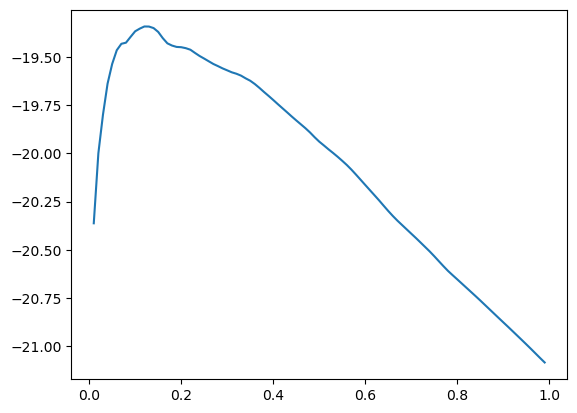

In [30]:
plt.plot(alpha,error)

In [31]:
err1=tuple(zip(alpha,error))

In [34]:
df_err=pd.DataFrame(err1,columns=['alpha','error'])

In [35]:
df_err[df_err.error==max(df_err['error'])]

,alpha,error
11,0.12,-19.340893


Random Forest Model

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rfr=RandomForestRegressor()
np.mean(cross_val_score(rfr,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-15.179132740262183

Applying GridSearchCV on models

In [46]:
from sklearn.model_selection import GridSearchCV

In [48]:
param={'n_estimators':range(10,300,10),'criterion':('squared_error', 'absolute_error', 'poisson', 'friedman_mse'),'max_features':('auto','sqrt','log2')}

gsv=GridSearchCV(rfr,param,scoring='neg_mean_absolute_error',cv=3)
gsv.fit(X_train,y_train)

c:\Users\yores\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
348 fits failed out of a total of 1044.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
348 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\yores\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\yores\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\yores\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_cons

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error',
                                       'poisson', 'friedman_mse'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [49]:
gsv.best_score_

-15.262198123365636